<a href="https://colab.research.google.com/github/maleehahassan/HIDA_Into_to_DL/blob/main/01_networks_as_code_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview: Wine Classification with Neural Networks

This notebook demonstrates how to classify wine samples into three categories using a neural network and the classic sklearn wine dataset. The workflow includes:

1. **Data Loading & Exploration**: The wine dataset is loaded and its features are inspected.
2. **Preprocessing**: The target labels are one-hot encoded for multiclass classification. Features are normalized using standard scaling to improve model performance.
3. **Data Splitting**: The data is split into training and test sets, stratified by class to ensure balanced representation.
4. **Model Building**: A simple feedforward neural network is constructed using TensorFlow/Keras, with one hidden layer and a softmax output for multiclass classification.
5. **Training**: The model is trained for 18 epochs, and training loss is visualized to monitor learning progress.
6. **Prediction & Evaluation**: Predictions are made on the test set, and the model’s performance is evaluated using a confusion matrix and accuracy score.

This notebook helps learners understand the full workflow of preparing data, building and training a neural network for multiclass classification, and evaluating results using visual tools.

In [ ]:
# Import the wine dataset from sklearn
from sklearn.datasets import load_wine

# Load the dataset into a variable
dataset = load_wine()

In [ ]:
# Display the dataset dictionary to inspect its contents
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# Show the feature names in the dataset
dataset['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# Import pandas for data manipulation
import pandas as pd

X = dataset['data']

# Assign the feature data to X and one-hot encode the target labels
y = pd.get_dummies(dataset["target"])

In [ ]:
# Print the type and shape of the feature matrix X
print(type(X), X.shape)

<class 'numpy.ndarray'> (178, 13)


In [ ]:
# Print the type and shape of the one-hot encoded target y
print(type(y), y.shape)

<class 'pandas.core.frame.DataFrame'> (178, 3)


In [ ]:
# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Fit the scaler to X and transform X to have zero mean and unit variance
scaler = StandardScaler().fit(X)
X_ = scaler.transform(X)

In [ ]:
# Print the mean values per column after scaling
print("mean values per column:\n", X_.mean(axis=-2))

mean values per column:
 [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]


In [ ]:
# Print the standard deviation values per column after scaling
print("std  values per column:\n", X_.std(axis=-2))

std  values per column:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Import train_test_split to split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y ,test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True,
                                                    stratify=y)


NameError: name 'X_' is not defined

In [ ]:
# Print the shapes of the train and test splits for features and targets
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(142, 13) (36, 13) (142, 3) (36, 3)


In [ ]:
# Set random seeds for reproducibility
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
from tensorflow import keras



2022-03-25 09:20:42.252327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-25 09:20:42.252351: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# Define a function to create the neural network model
def create_model(X_shape):
    # Input layer
    inputs = keras.Input(shape=X_shape[1])

    # Hidden layer with 16 units and ReLU activation
    hidden_layer = keras.layers.Dense(16, activation="relu")(inputs)
    #hidden_layer = keras.layers.Dense(32, activation="relu")(hidden_layer)

    # Output layer with 3 units (for 3 classes) and softmax activation
    output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)

    # Create the model object
    model = keras.Model(inputs=inputs, outputs=output_layer)
    return model

In [ ]:
# Create the model using the training data shape
model = create_model(X_train.shape)

2022-03-25 09:20:44.124295: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-25 09:20:44.124323: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-25 09:20:44.124339: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fwc049): /proc/driver/nvidia/version does not exist
2022-03-25 09:20:44.124505: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Display the model architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())

In [ ]:
# Train the model on the training data for 18 epochs
history = model.fit(X_train, y_train, epochs=18)

Epoch 1/18
5/5 [==============================] - 0s 899us/step - loss: 1.2224
Epoch 2/18
5/5 [==============================] - 0s 1ms/step - loss: 1.1295
Epoch 3/18
5/5 [==============================] - 0s 1ms/step - loss: 1.0460
Epoch 4/18
5/5 [==============================] - 0s 1ms/step - loss: 0.9641
Epoch 5/18
5/5 [==============================] - 0s 2ms/step - loss: 0.8902
Epoch 6/18
5/5 [==============================] - 0s 1ms/step - loss: 0.8227
Epoch 7/18
5/5 [==============================] - 0s 1ms/step - loss: 0.7612
Epoch 8/18
5/5 [==============================] - 0s 3ms/step - loss: 0.7060
Epoch 9/18
5/5 [==============================] - 0s 3ms/step - loss: 0.6541
Epoch 10/18
5/5 [==============================] - 0s 5ms/step - loss: 0.6091
Epoch 11/18
5/5 [==============================] - 0s 5ms/step - loss: 0.5668
Epoch 12/18
5/5 [==============================] - 0s 3ms/step - loss: 0.5293
Epoch 13/18
5/5 [==============================] - 0s 4ms/step - loss: 

<AxesSubplot:>

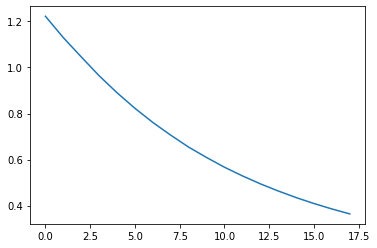

In [ ]:
# Import seaborn for plotting
import seaborn as sns

# Plot the training loss over epochs
sns.lineplot(x=history.epoch, y=history.history['loss'])

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a DataFrame for the predictions
prediction = pd.DataFrame(y_pred, columns=y.columns)

# Display the predictions
prediction

,0,1,2
0,0.034256,0.932957,0.032787
1,0.070273,0.087507,0.842220
2,0.483821,0.293333,0.222846
3,0.016740,0.022930,0.960329
4,0.094652,0.863064,0.042284
5,0.733071,0.089436,0.177493
6,0.591121,0.085639,0.323240
7,0.057439,0.370285,0.572276
8,0.298298,0.521902,0.179801
9,0.060122,0.043421,0.896457


In [ ]:
# Get the predicted species by finding the class with the highest probability
predicted_species = prediction.idxmax(axis="columns")
predicted_species

0     1
1     2
2     0
3     2
4     1
5     0
6     0
7     2
8     1
9     2
10    0
11    0
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    2
20    0
21    0
22    0
23    1
24    0
25    2
26    1
27    2
28    1
29    0
30    2
31    1
32    2
33    1
34    2
35    1
dtype: int64

In [ ]:
# Import confusion_matrix and accuracy_score for model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score

# Get the true species from the test set
true_species = y_test.idxmax(axis="columns")

# Compute the confusion matrix
matrix = confusion_matrix(true_species, predicted_species)

# Display the confusion matrix
print(matrix)

[[10  0  2]
 [ 1 12  1]
 [ 0  0 10]]


In [ ]:
# Calculate and print the accuracy of the model
accuracy_score(true_species, predicted_species)

0.8888888888888888